Make sure you have all the necessary modules installed

In [ ]:
# install cv2
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [ ]:
# or, alternatively
!pip install opencv-python

In [ ]:
# then, install matplotlib.pyplot
!pip install matplotlib

Import all the necessary libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt

Function to read an image

In [ ]:
def read_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

Function to visualize Sentinel-2 images

In [ ]:
def visualize_image(image, title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

Function to detect and match keypoints using ORB

In [ ]:
def detect_and_match_keypoints(image1, image2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

    # Initialize the ORB detector
    orb = cv2.ORB_create(nfeatures=500, edgeThreshold=15, patchSize=31, WTA_K=2)

    # Find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # Create BFMatcher (Brute Force Matcher) object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Apply ratio test
    good_matches = []
    for match in matches:
        if match.distance < 0.75 * match.trainIdx:
            good_matches.append(match)

    return kp1, kp2, good_matches

In [ ]:
def visualize_keypoints_matches(image1, image2, kp1, kp2, matches):
    img_matches = cv2.drawMatches(image1, kp1, image2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(12, 6))
    plt.imshow(img_matches)
    plt.title("Keypoint Matches")
    plt.axis('off')
    plt.show()

# Example usage

In [ ]:
image_path1 = '/content/Example_Image-1.jpg'
image_path2 = '/content/Example_Image-2.jpg'

Load Sentinel-2 images

In [ ]:
image1 = read_image(image_path1)
image2 = read_image(image_path2)

Visualize Sentinel-2 images

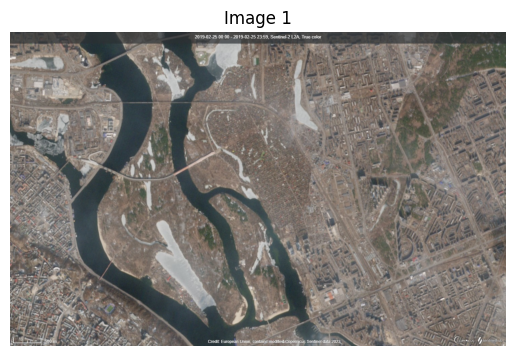

In [ ]:
visualize_image(image1, title="Image 1")

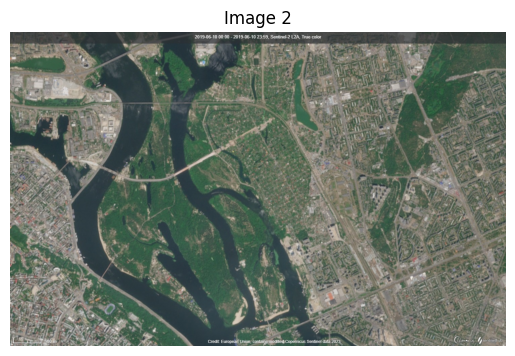

In [ ]:
visualize_image(image2, title="Image 2")

Detect and match keypoints using ORB

In [ ]:
kp1, kp2, matches = detect_and_match_keypoints(image1, image2)

Visualize keypoints and matches

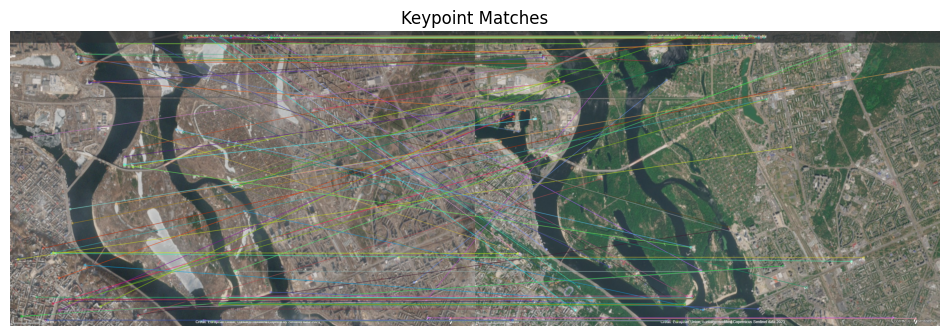

In [ ]:
visualize_keypoints_matches(image1, image2, kp1, kp2, matches)